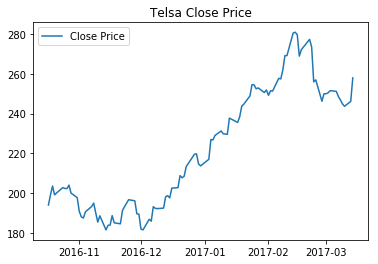

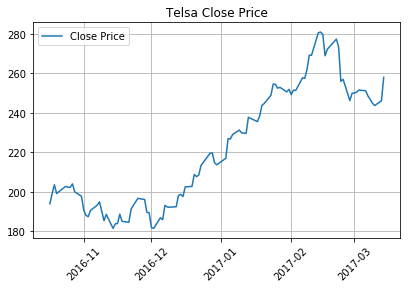

In [56]:
'''
从一些网站的 API 获取数据
'''
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


def strToDate(dateStr):
    return datetime.strptime(dateStr, '%Y%m%d')

# 普通 pyplot 来绘制。
def grap_data(inc):
    url = 'http://chartapi.finance.yahoo.com/instrument/1.0/' + inc +'/chartdata;type=quote;range=5m/csv'
    data_source = urllib.request.urlopen(url).read().decode('utf-8')
    split_source = data_source.split('\n')
    stock_data = []
    for line in split_source:
        split_line = line.split(',')
        if (len(split_line) == 6) and 'close' not in line and 'labels' not in line:
            stock_data.append(line)
    date1, closep, highp, lowp, openp, volume = np.loadtxt(stock_data, delimiter = ',', unpack = True)
    dates = [strToDate(str(int(date))) for date in date1]
   
    plt.plot_date(dates, closep, '-', label='Close Price')
    plt.legend()
    plt.title('Telsa Close Price')
    plt.show()

# 用 sub_plot 来绘制。
def grap_data_figure(inc):
    url = 'http://chartapi.finance.yahoo.com/instrument/1.0/' + inc +'/chartdata;type=quote;range=5m/csv'
    data_source = urllib.request.urlopen(url).read().decode('utf-8')
    split_source = data_source.split('\n')
    stock_data = []
    for line in split_source:
        split_line = line.split(',')
        if (len(split_line) == 6) and 'close' not in line and 'labels' not in line:
            stock_data.append(line)
    date1, closep, highp, lowp, openp, volume = np.loadtxt(stock_data, delimiter = ',', unpack = True)
    dates = [strToDate(str(int(date))) for date in date1]
   
    fig = plt.figure()
    ax1 = plt.subplot2grid((1, 1), (0, 0))
    ax1.plot_date(dates, closep,'-', label='Close Price')
    # x 轴上的 lable 调整。
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.grid(True)
    
    plt.legend()
    plt.title('Telsa Close Price')
    plt.subplots_adjust(left = 0.09,
                       bottom = 0.20,
                       right = 0.94,
                       top = 0.95,
                       wspace=0.2,
                       hspace=0.2)
    plt.show()
    
    
    
grap_data('TSLA')
grap_data_figure('TSLA')